# Data Analysis (Part 3: NHES)

#### HISTORY
* 10/25/20 Initial exploration of OECD dataset
* 11/13/20 Data analysis of OECD data from 2015
* 12/11/20 Data Analysis of Google Trends searches
---

In this notebook, I will be exploring data concerning homeschooling in the United States using the NHES data. Because the google trends data showed a marked increase in searches for 'how to homeschool' it is important to explore trends in homeschooling practices. I will answer the following questions:
* What is the average amount of time parents spend homeschooling?
* Do parents enlist outside instructors to teach their kids?
* Do parents/family typically train to become homeschool teachers?
* What is the most popular teaching style?


In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in my data files
nhes_df = pd.read_csv("../data/cleaned/nhes_CLEAN.csv")
hmsc_df = pd.read_csv("../data/hmsc_df.csv")
enroll_df = pd.read_csv("../data/enroll_df.csv")

## Question 1:
### How much time do parents spend homeschooling?

I will find mean of the amount of days parents homeschool per week and the average number of hours they homeschool per week.

In [3]:
#Mean of days per week
hmsc_df['days_hmsc'].mean()

4.838768115942029

In [4]:
#Mean of hours per week
hmsc_df['hrs_hmsc'].mean()

21.98731884057971

On average, people homeschool their children 4.8 days (close to 5 days) per week for 22 hours a week. While parents homeschool their children every day as if they were enrolled in public or private school, they homeschool for significantly less time than public/private schools each week. Most ublic schools stay in session for seven or eight hours a day for five days a week, so compared 35-40 hour school week, homeschooled children spend less time in "class." 

## Question 2:
### What is the average age of homeschooled children?

In [5]:
#Mean of age
print(hmsc_df['age'].mean())

#Median of age
print(hmsc_df['age'].median())

12.51268115942029
13.0


The average age of a homeschooled child is 12 and a half and the median age is 13. In this data, children who are homeschooled tend to be older.

<AxesSubplot:>

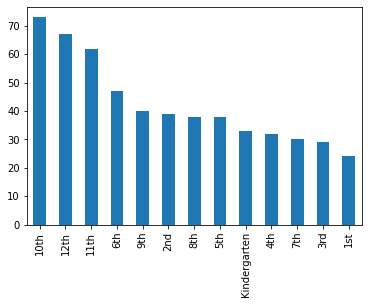

In [6]:
hmsc_grade_count = hmsc_df['hmsc_grade_year'].value_counts()
hmsc_grade_count.sort_values(ascending=False).plot(kind='bar')

As evident from the graph, a large portion of homeschooled children are/could be considered 10th, 11th, and 12th graders. What are the percentages of this distribution?

In [7]:
hmsc_grade_pct = (hmsc_df['hmsc_grade_year'].value_counts())/hmsc_df['hmsc_grade_year'].count()
hmsc_grade_pct

10th            0.132246
12th            0.121377
11th            0.112319
6th             0.085145
9th             0.072464
2nd             0.070652
5th             0.068841
8th             0.068841
Kindergarten    0.059783
4th             0.057971
7th             0.054348
3rd             0.052536
1st             0.043478
Name: hmsc_grade_year, dtype: float64

In [8]:
hmsc_grade_pct[['9th', '10th', '11th', '12th']].sum()

0.4384057971014493

In [9]:
hmsc_grade_pct[['Kindergarten', '1st', '2nd', '3rd', '4th']].sum()

0.28442028985507245

43.8% of homeschooled students in 2016 would have been in high school compared to just 28.4% of children who would have been in elementary school. This is interesting because it suggests that parents are opting to teach their teens more difficult work instead of teaching their younger children whose school lessons are more simple by comparison. What is this distribution of "year grade" (or the equivalent year grade) of homeschool students?

## Question 3:
### Do homeschooling parents prefer following a strict curriculum or informal learning?
Some people may choose to homeschool to avoid the rigor, stress, or strictness of traditional education methods. When parents homeschool, do they continue to use traditional lesson plans, or do they use more informal, experience-based teaching?

In [10]:
teach_style = hmsc_df['teach_style'].value_counts()
teach_style

Mostly use formal curriculum      276
Strictly use formal curriculum    179
Mostly use informal learning       61
Always use informal learning       36
Name: teach_style, dtype: int64

<AxesSubplot:>

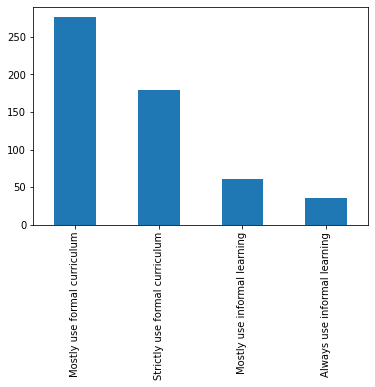

In [11]:
teach_style.plot(kind='bar')

A large majority of parents used a formal curriculum as opposed to following informal learning strategies.

#### What percentage of parents strictly followed or mostly followed a formal curriculum?

In [12]:
#Taking sum of the # of people who "Mostly/Strictly use a formal curriculum"
formal_sum = sum(hmsc_df['teach_style'] == 'Mostly use formal curriculum') + sum(hmsc_df['teach_style'] == 'Strictly use formal curriculum')
#Dividing the sum for formal learning by the total number of people teaching
formal_pct = formal_sum/hmsc_df['teach_style'].count()
print(formal_pct)
1-formal_pct

0.8242753623188406


0.17572463768115942

82.4% of parents primarily use formal teaching styles, while 17.6% try to encourage informal learning. A very large majority of parents prefer formal teaching methods. It may be that their child mainly struggled with the traditional school environment as opposed to struggling with the lessons themselves, so they continued traditional practice in a new setting. 

If most parents are using a formal curriculum, how do they develop it? Where do they find lesson plans for their children to follow?

## Question 4:
### Where do parents find lessons for their homeschool curriculum?

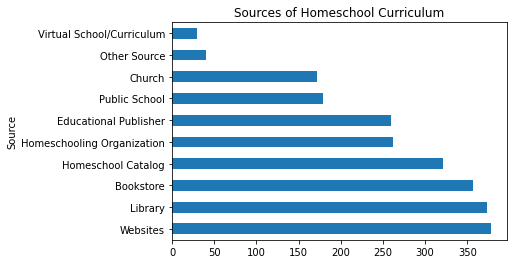

In [13]:
curric_cols = ['Websites', 'Bookstore', 'Other Source', 'Public School',
       'Virtual School/Curriculum', 'Homeschooling Organization',
       'Homeschool Catalog', 'Educational Publisher', 'Library', 'Church']

curric_source_count=(hmsc_df[curric_cols]==1).sum()
curric_source_plt = curric_source_count.sort_values(ascending=False).plot(kind='barh', 
                                                    title = 'Sources of Homeschool Curriculum',
                                                      xlabel = 'Source', 
                                                      ylabel = 'Number of Parents Using Source',
                                                     figsize = (6,4))
curric_source_plt.get_figure().savefig('../data_story_presentation/img/curric_source.jpg', 
                                  bbox_inches='tight', dpi=300)

In [14]:
curric_source_count

Websites                      378
Bookstore                     357
Other Source                   40
Public School                 179
Virtual School/Curriculum      30
Homeschooling Organization    262
Homeschool Catalog            321
Educational Publisher         259
Library                       373
Church                        172
dtype: int64

People compose their homeschool curriculum from a variety of sources, but the most people find their curriculum from websites, libraries, and bookstores. The first two make sense becuase they are typically free resources which lessen the cost of homeschooling. Alternatively, if a person wants to invest in a nice curriculum, they may buy one from the bookstore or a homeschool catalog. Very few people (only 30) actually used a learning resources from a virtual school. 

Once a parent develops their curriculum, how do they prepare to place themselves in the role of "teacher"? If they don't have a background in education, do they take a course to learn teaching methods?

## Question 5:
### Is it common for parents take a course to prep for homeschooling their children?

In [15]:
hmsc_df['hmsc_course'].value_counts()

No Course             422
Online                 50
Online & In-Person     48
In-Person              32
Name: hmsc_course, dtype: int64

A large majority of parents did not train to start homeschooling their kids. What percentage of parents actually choose to take a course in preparation to homeschool?

In [16]:
#Number of parents who did not take any courses
no_course_sum = sum(hmsc_df['hmsc_course'] == 'No Course')

#Percent of parents who did not take any courses 
no_course_pct = no_course_sum/(hmsc_df['hmsc_course'].count())

#Percent of parents who DID TAKE a course
1-no_course_pct

0.23550724637681164

Only 23.6% of parents took a course to prepare for homeschooling their children. I suppose if one has enough education themselves they may not need to take a course to help follow a lesson plan. In that case, what is the average education level of parents who homeschool?

## Question 6:
### What is the education levels of parents who homeschool?

In [17]:
parent_educ_dict = {1: "No High School Credential",
                   2: "High School Diploma or Equivalent",
                   3: "Vocational/Technical School",
                   4: "College Graduate",
                   5: "Graduate/Professional School"}

hmsc_df['parent_educ_cat'] = hmsc_df['parent_educ'].map(parent_educ_dict)
hmsc_df['parent_educ_cat'].value_counts()

Vocational/Technical School          175
College Graduate                     142
Graduate/Professional School         105
High School Diploma or Equivalent     76
No High School Credential             54
Name: parent_educ_cat, dtype: int64

In [18]:
print(hmsc_df['parent_educ'].mean())
print(hmsc_df['parent_educ'].median())

3.3043478260869565
3.0


The category that corresponds to a mean and median of 3 is Vocational/Technical School; therefore, the average parent who homeschools has a associate's degree or trade certificate. What are the proportions of homeschooling parents who have any kind of post-secondary schooling (associate's degree/certificate or higher)?

In [19]:
diploma_less_sum = sum(hmsc_df['parent_educ_cat'] == "High School Diploma or Equivalent") + sum(hmsc_df['parent_educ_cat'] == 'No High School Credential')
diploma_less_pct = diploma_less_sum/(hmsc_df['parent_educ_cat'].count())
1-diploma_less_pct

0.7644927536231885

More than three quarters of parents who homeschooled in 2016 had post-secondary schooling (76.4% of them did). This says that most parents have an educational background that is probably sufficient to explain more difficult subjects to their children. 

Given that homeschooling may require that at least one parent stay home from work to teach the child, I think that families who homeschool must have a higher income. If they are able to willingly forgo one source of income, they must have the financial ability to do so. Also, if that family has hired a private tutor or teacher, that would cost more money than sending a child to public school. I think that homeschool families will have an average income similar to families who send their children to private schools, and public school families will have a lower average income.

## Question 7:
### What was the average income for public school/private school/homsechool families?

In [20]:
income_cat_dict = {1: '$0 to $10,000',
                  2: '$10,001 to $20,000',
                  3: '$20,001 to $30,000',
                  4: '$30,001 to $40,000',
                  5: '$40,001 to $50,000',
                   6: '$50,001 to $60,000',
                  7: '$60,001 to $75,000',
                  8: '$75,001 to $100,000',
                  9: '$100,001 to $150,000',
                  10: '$150,001 or more'}

nhes_df['ttl_income_cat'] = nhes_df['ttl_income'].map(income_cat_dict)

In [21]:
nhes_df.groupby('school_type')['ttl_income_cat'].value_counts()

school_type     ttl_income_cat      
Homeschooled    $75,001 to $100,000       87
                $100,001 to $150,000      64
                $60,001 to $75,000        61
                $20,001 to $30,000        58
                $10,001 to $20,000        54
                $40,001 to $50,000        53
                $30,001 to $40,000        50
                $50,001 to $60,000        48
                $0 to $10,000             44
                $150,001 or more          33
Private School  $150,001 or more         585
                $100,001 to $150,000     296
                $75,001 to $100,000      185
                $60,001 to $75,000       110
                $30,001 to $40,000        80
                $40,001 to $50,000        78
                $50,001 to $60,000        75
                $20,001 to $30,000        65
                $10,001 to $20,000        35
                $0 to $10,000             23
Public School   $100,001 to $150,000    1971
                $1

In [22]:
nhes_df.groupby('school_type')['ttl_income'].mean()

school_type
Homeschooled      5.630435
Private School    7.971279
Public School     6.447586
Name: ttl_income, dtype: float64

Each of these averages refers to an income bracket. According to figures from the codebook, the average private school family earns between $60,001 to $75,000 per year (but closely verges on $75,001 to $100,000). The average public school family earns between $50,001 to $60,000, and the average homeschool family earns between $40,001 to $50,000 per year. On second thought, it is not surprising to see that homeschool families earn less than public school families because they are, indeed, likely to only have one income. It may be that the average income for the one parent who does not homeschool is higher relative to the income of one parent of a public school student. However, if that child comes from a two-parent family, the household income doubles as a result of both parents being employed.

## Question 8:
### If the child is homeschooled over the internet, what entity provides their instruction?

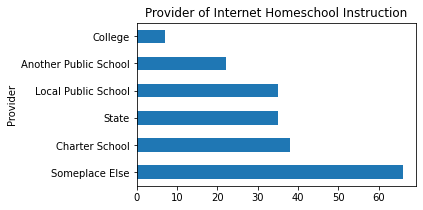

In [23]:
internet_hmsc = ['Local Public School', 'State', 'Charter School', 'Another Public School', 
                 'College', 'Someplace Else']

internet_hmsc_count = (hmsc_df[internet_hmsc]==1).sum()
int_hmsc_plt = internet_hmsc_count.sort_values(ascending=False).plot(kind='barh', 
                                                      title = "Provider of Internet Homeschool Instruction",
                                                     xlabel = "Provider",
                                                     ylabel = 'Number of Parents Who Use the Provider',
                                                        figsize = (5,3))
int_hmsc_plt.get_figure().savefig('../data_story_presentation/img/internet_hmsc_count.jpg', 
                                  bbox_inches='tight', dpi=300)

Because the 'Someplace else" is not specified, it is difficult to get a true sense of how children receive online education. The next few popular options were charter schools, state K-12 schools, and online classes offered by local public schools. 

Unfortunately, the homeschool data does not have potential dependent variables, bu thte data for enrolled children does. Similar to the regressions form the OECD data, I am curious whether children with more involved parents do better in school.

## Some linear regressions with the 'Enrolled" data frame

## Question 9:
### Do public school children who have more meals with their family also have better behavior?
Does the number of notes celebrating a child's good behavior increase with the more time families spend together over meals?

In [24]:
model1 = smf.ols('behavior_good ~ meal_together', data=enroll_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          behavior_good   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     28.36
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           1.02e-07
Time:                        17:07:51   Log-Likelihood:                -36533.
No. Observations:               13523   AIC:                         7.307e+04
Df Residuals:                   13521   BIC:                         7.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8417      0.078     10.861      0.000       0.690       0.994
meal_together     0.0796      0.015      5.326      0.000       0.050       0.109
==============================================================================
Omnibus:                    23272.256   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32093608.579
Skew:                          11.896   Prob(JB):                         0.00
Kurtosis:                     240.470   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

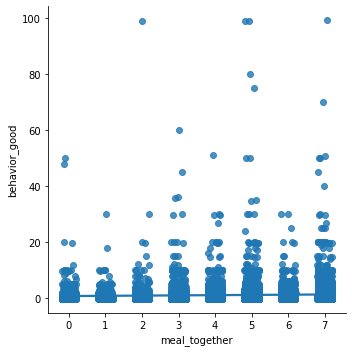

In [25]:
sns.lmplot(x='meal_together', y='behavior_good', x_jitter=.2, y_jitter=.2, data=enroll_df, markers="o")

In [26]:
#The correlation coefficient
enroll_df.corr().loc['meal_together', 'behavior_good']

0.0457529324377427

In [27]:
enroll_df['meal_together'].count()

13523

There is a significant relationship between bonding over meals and good behavior. Looking at the regression plots, it seems like these relationships should not be significant, but there are about 13,523 observations accounted for in the regression model. For each additional meal a child has with their family, teachers send home .07 more good behavior notes on average.

## Question 10:
### Do children receive better grades the more a parent helps them with their homework?
Is there an association between higher letter grades the number of hours parents spend helping their children with homework?

In [28]:
model2 = smf.ols('grades ~ hw_help', data=enroll_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     95.83
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           1.50e-22
Time:                        17:07:53   Log-Likelihood:                -21375.
No. Observations:               12795   AIC:                         4.275e+04
Df Residuals:                   12793   BIC:                         4.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8020      0.025     73.295      0.000       1.754       1.850
hw_help        0.0847      0.009      9.789      0.000       0.068       0.102
==============================================================================
Omnibus:                     2229.768   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3580.852
Skew:                           1.269   Prob(JB):                         0.00
Kurtosis:                       3.529   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2.pvalues.loc['hw_help']

1.4990069919135698e-22

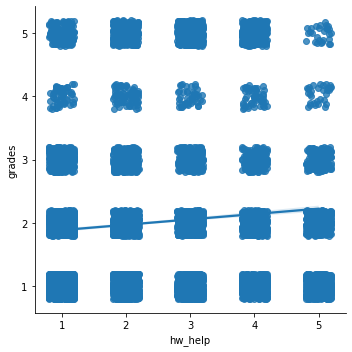

In [30]:
sns.lmplot(x='hw_help', y='grades', x_jitter=.2, y_jitter=.2, data=enroll_df, markers="o")

In [31]:
#The correlation coefficient
enroll_df.corr().loc['grades', 'hw_help']

0.08622901099631745

There is a significant relationship between hours of homework help and better letter grades; for each additonal hour parents spend helping their child with homework, their grade increases very slightly. The correlation is near .1 so there is a very weak, positive correlation.